In [1]:
from utils import parse_trajectory

file_path = "../test/traj.out"
traj_df = parse_trajectory(file_path)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def compute_vacf(traj_df, timesteps):
    """
    Compute the Velocity Autocorrelation Function (VACF) for the system.

    Args:
        traj_df: DataFrame containing trajectory data.
        timesteps: List of timesteps in the trajectory.

    Returns:
        vacf: Dictionary with timesteps (relative time) as keys and VACF values as values.
    """
    # Get the unique particle IDs
    particle_ids = traj_df["id"].unique()

    # Initialize storage for initial velocities
    initial_velocities = (
        traj_df[traj_df["timestep"] == timesteps[0]][["id", "vx", "vy", "vz"]]
        .set_index("id")
        .values
    )

    # Initialize VACF results
    vacf = []

    # Iterate over timesteps to compute VACF
    for t in timesteps:
        # Get velocities at the current timestep
        current_velocities = (
            traj_df[traj_df["timestep"] == t][["id", "vx", "vy", "vz"]]
            .set_index("id")
            .values
        )

        # Compute dot product of initial and current velocities
        dot_products = np.sum(initial_velocities * current_velocities, axis=1)

        # Normalize by initial velocities squared (denominator of VACF)
        initial_magnitudes = np.sum(initial_velocities**2, axis=1)
        vacf_value = np.mean(dot_products / initial_magnitudes)
        vacf.append(vacf_value)

    return timesteps, vacf


def plot_vacf(timesteps, vacf):
    """
    Plot the Velocity Autocorrelation Function (VACF).

    Args:
        timesteps: List of timesteps (relative time).
        vacf: List of VACF values.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(timesteps, vacf, marker="o", label="VACF(t)")
    plt.xlabel("Time (Timestep)", fontsize=14)
    plt.ylabel("Velocity Autocorrelation Function (VACF)", fontsize=14)
    plt.title("Velocity Autocorrelation Function (VACF) Over Time", fontsize=16)
    plt.grid(alpha=0.4)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig("VACF.png", dpi=300)
    plt.show()


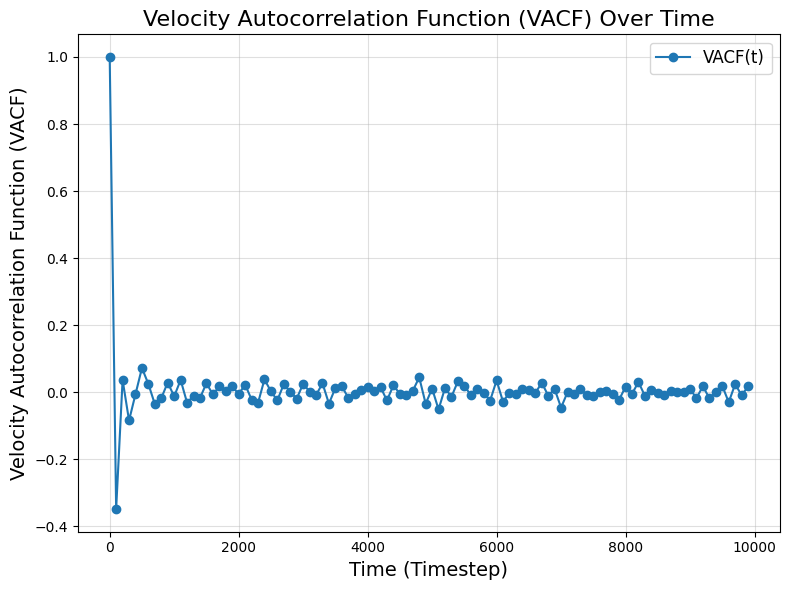

In [5]:
# Get unique timesteps
timesteps = sorted(traj_df["timestep"].unique())

# Compute VACF
timesteps, vacf = compute_vacf(traj_df, timesteps)

# Plot VACF
plot_vacf(timesteps, vacf)